In [6]:
# Dependencies and Setup
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import style
style.use("ggplot")
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import nltk
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [7]:
#Save the clean twitter csv
Twitter_df = pd.read_csv("Data/sentiment_twitter_clean.csv")
Twitter_df.head()

,Index,Tweets,Label
0,106,real good moment missssssssss much,0
1,217,reading manga,0
2,288,need send em accountant tomorrow oddly wasnt e...,0
3,540,add myspace myspacecomlookthunder,0
4,624,sleepy good times tonight though,0


In [8]:
#vectorize it
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(Twitter_df['Tweets'])
y=Twitter_df.Label

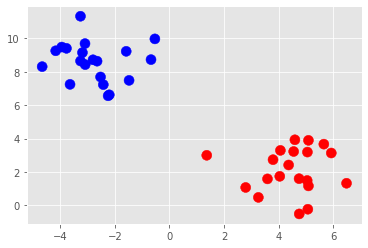

In [9]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=40, centers=2, random_state=42, cluster_std=1.25)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.savefig("Images/SVM.png")
plt.show()

In [10]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

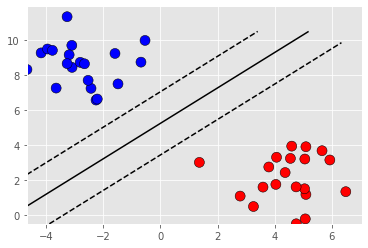

In [11]:
# WARNING! BOILERPLATE CODE HERE!
# Plot the decision boundaries
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.savefig("Images/SVM.png")
plt.show()

# Validation

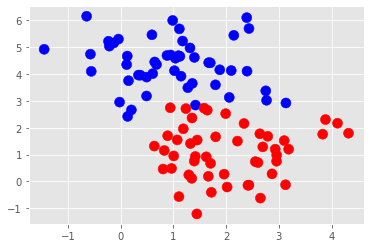

In [12]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=.95)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.savefig("Images/SVM_validation.png")
plt.show()

In [13]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

# splitting data into training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=2)

# Train the Model

In [14]:
# Fit to the training data and validate with the test data
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#### Make prediction

In [15]:
predictions = model.predict(X_test)
print(f"First 10 Prediction: {predictions[:10]}")
print(f"First 10 Actual label: {y_test[:10].tolist()}")

First 10 Prediction: [0 1 0 1 1 0 0 0 0 0]
First 10 Actual label: [0, 1, 0, 1, 1, 0, 0, 0, 0, 0]


In [16]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.9857142857142858
Testing Data Score: 0.9


In [17]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        18
           1       0.80      1.00      0.89        12

    accuracy                           0.90        30
   macro avg       0.90      0.92      0.90        30
weighted avg       0.92      0.90      0.90        30



# Hyperparameter Tuning

Use GridSearchCV to tune the model's parameters

In [18]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [19]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler(with_mean=False).fit(X_train)

In [20]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.929, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.929, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.929, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=1.000, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.929, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.929, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.1s finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             verbose=3)

In [22]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'gamma': 0.0001}
0.9714285714285715


The SVM had a higher accuracy, (90%). The scores of the hypertuned GridSearch models slightly increased when compared to the test scores of the regular SVM models.

# Save the model

In [23]:
import joblib
model = 'SVM.sav'
joblib.dump(model, 'Data/SVM.sav')

['Data/SVM.sav']